In [21]:
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from multiprocessing import cpu_count
import numpy as np
import pickle
import time

from games.foraging import Foraging
from agents.iql_agent import IQLAgent, IQLAgentConfig

from auxiliar.explorative_agents_training_and_eval import entrenar_agente_tarea, eval_experiments

In [22]:
game_config = [
        "Foraging-5x5-2p-1f-v3",
        "Foraging-5x5-2p-2f-v3",
        "Foraging-5x5-3p-1f-v3",
        "Foraging-5x5-3p-1f-coop-v3",
    ]

In [ ]:
0.9997 ** (2000 * 10)

In [23]:
configurations = {
    'fast_iql_0': {
        'game': game_config[0],
        'agent_0': IQLAgentConfig(
            start_epsilon=1.0,          # Epsilon inicial
            min_epsilon=0.1,            # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9997,     # Decaimiento lineal
            alpha=0.15,                 # Taza de aprendizaje
            gamma=0.95,                 # Factor de descuento
            learn=True,                 # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                      # Semilla para la aleatoriedad
        ),
        'agent_1': IQLAgentConfig(
            start_epsilon=1.0,          # Epsilon inicial
            min_epsilon=0.1,            # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9997,     # Decaimiento lineal
            alpha=0.15,                 # Taza de aprendizaje
            gamma=0.95,                 # Factor de descuento
            learn=True,                 # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                      # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 10,
        }
    },
    'fast_iql_1': {
        'game': game_config[1],
        'agent_0': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9997, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9997, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 20,
        }
    },
    'fast_iql_2': {
        'game': game_config[2],
        'agent_0': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_2': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 25,
        }
    },
    'fast_iql_3': {
        'game': game_config[3],
        'agent_0': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_1': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.9999, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'agent_2': IQLAgentConfig(
            start_epsilon=1.0,      # Epsilon inicial
            min_epsilon=0.1,        # Mínimo valor que puede tomar Epsilon
            epsilon_decay = 0.15, # Decaimiento lineal
            alpha=0.2,              # Taza de aprendizaje
            gamma=0.95,             # Factor de descuento
            learn=True,             # Variable que determina si se esta en étapa de exploración o no (update y Epsilon-greedy o política greedy)
            seed=1                  # Semilla para la aleatoriedad
        ),
        'train_config': {
            'episodes': 2000,
            'iterations': 25,
        }
    }
}

In [24]:
# Alias o nombre de los agentes para cada configuración
agent_alias = None

# Clases de los agentes definidas para cada configuración
agent_classes = {'fast_iql_0': {'agent_0': IQLAgent,   'agent_1': IQLAgent},
                 'fast_iql_1': {'agent_0': IQLAgent,   'agent_1': IQLAgent},
                 'fast_iql_2': {'agent_0': IQLAgent,   'agent_1': IQLAgent, 'agent_2': IQLAgent},
                 'fast_iql_3': {'agent_0': IQLAgent,   'agent_1': IQLAgent, 'agent_2': IQLAgent}}

In [25]:
# Armar lista de tareas
tareas = [(config_id, config, agent_classes[config_id], None if agent_alias is None else agent_alias[config_id]) for config_id, config in configurations.items() if config_id]
config_keys = [tarea[0] for tarea in tareas]

# Número de procesos
n_proc = min(len(tareas), cpu_count())

In [26]:
with ThreadPool(n_proc) as pool:
    resultados = pool.map(entrenar_agente_tarea, tareas)

Agent: agent_0
Observation: [1. 2. 3. 2. 0. 2. 3. 0. 1.]
Agent: agent_1
Observation: [1. 2. 3. 3. 0. 1. 2. 0. 2.]
Agent: agent_0
Observation: [1. 2. 1. 3. 1. 1. 4. 4. 1. 2. 2. 1.]
Agent: agent_1
Observation: [1. 2. 1. 3. 1. 1. 2. 2. 1. 4. 4. 1.]
Agent: agent_0
Observation: [3. 1. 4. 2. 2. 2. 2. 0. 2. 4. 1. 1.]
Agent: agent_1
Observation: [3. 1. 4. 2. 0. 2. 2. 2. 2. 4. 1. 1.]
Agent: agent_2
Observation: [3. 1. 4. 4. 1. 1. 2. 2. 2. 2. 0. 2.]
Agent: agent_0
Observation: [1. 3. 3. 3. 4. 1. 1. 4. 1. 3. 0. 1.]
Agent: agent_1
Observation: [1. 3. 3. 1. 4. 1. 3. 4. 1. 3. 0. 1.]
Agent: agent_2
Observation: [1. 3. 3. 3. 0. 1. 3. 4. 1. 1. 4. 1.]
Agent agent_0: 0.02525
Agent agent_1: 0.97475
Agent agent_0: 0.6666666666666725
Agent agent_1: 0.33333333333333626
Last average rewards over 10 iterations (20000 episodes):
Agent agent_0: 0.6666666666666725
Agent agent_1: 0.33333333333333626
Agent agent_0: 0.41159999999998725
Agent agent_1: 0.41159999999998725
Agent agent_2: 0.1757999999999943
Agent agent_

Intentando cargar el experimento: fast_iql_0
fast_iql_0 cargado con éxito.
Intentando cargar el experimento: fast_iql_1
fast_iql_1 cargado con éxito.
Intentando cargar el experimento: fast_iql_2
fast_iql_2 cargado con éxito.
Intentando cargar el experimento: fast_iql_3
fast_iql_3 cargado con éxito.
Experiment config: Foraging-5x5-2p-1f-v3


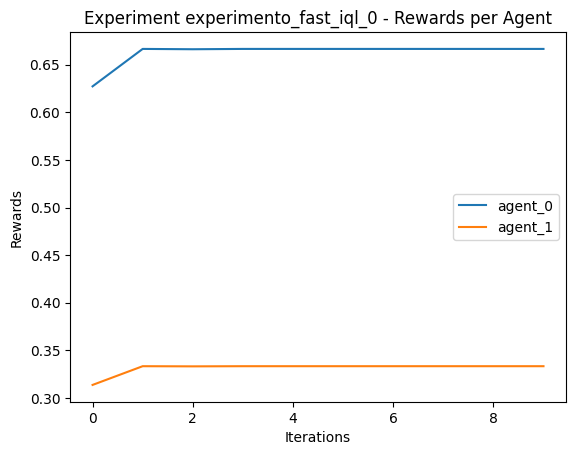

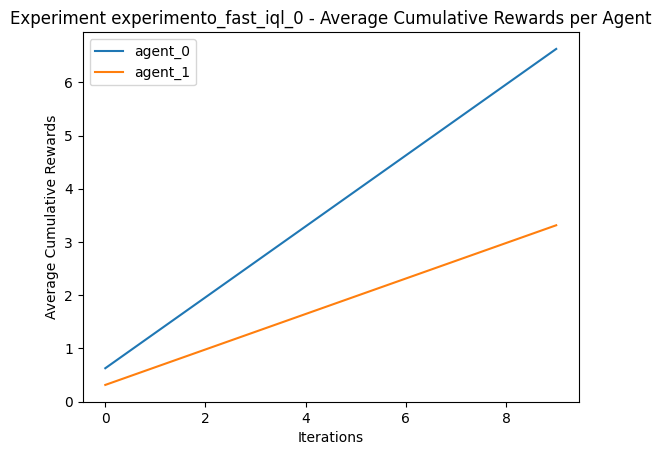

Step: 0
Agent agent_0 observe: [1. 2. 3. 2. 0. 2. 3. 0. 1.]
Agent agent_1 observe: [1. 2. 3. 3. 0. 1. 2. 0. 2.]


In [ ]:
experiments_names = ['iql_0', 'iql_1', 'iql_2', 'iql_3'] # config_keys # Usar nombre de las tareas recién ejecutadas (config_keys) o elegir a mano []
experiments = eval_experiments(experiments_names)